In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
data=np.array(pd.read_csv('ds1_train.csv'))

In [3]:
class Naive_Bayes:
    
    def fit(self, X, y):
        m, n= X.shape                     # m->no. of training examples, n-> no. of features
        self._classes= np.unique(y)       # array of unique values in y... determines the classes: 0 and 1
        n_classes= len(self._classes)     # number of classes
        
        
        #calculate the mean, variance and the prior (relative frequency) of each class
        
        #initialising the arrays with required shape
        self.means= np.zeros((n_classes, n))
        self.var= np.zeros((n_classes, n))
        self.priors= np.zeros(n_classes)
        
        for i, c in enumerate(self._classes):
            X_c=[]
            for j in range(m):                           # extract the set from X which belong to given class
                if y[j]==c:
                    X_c.append(X[j])
            self.means[i, :]= np.mean(X_c, axis=0)    # mean of each feature belonging to the class (along columns)
            self.var[i, :]= np.var(X_c, axis=0)       # variance of each feature belonging to the class
            self.priors[i]= (len(X_c))/ (float(m))
            
            
    def _predict(self, x):                         # makes prediction on one training example
        posteriors=[]                              # list to contain the posteriors with respect to all classes and then argmax is computed over this list
        for i, c in enumerate(self._classes):
            prior= np.log(self.priors[i])
            posterior= np.sum(np.log(self.pdf(i, x)))   # pdf is the probablity distribution function calculated for all features individually... the mean corresponding to the class is accessed by the index passed as parameter... _pdf returns a (1*n) array for a feature
            posterior+=prior
            
            posteriors.append(posterior)
            
        return self._classes[np.argmax(posteriors)]
    
    
    def predict(self, X):
        Y_pred=[]
        for x in X:
            Y_pred.append(self._predict(x))
        return np.array(Y_pred)
    
    
    def pdf(self, idx, x):
        mean= self.means[idx]         # mean of given class => a (1*n) array
        var= self.var[idx]            # var of given class => a (1*n) array
        
        pdv=(np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi*var))   # pdv is also a (1*n) array 
        return pdv
            
        
        

In [4]:
# scales the data according to z-score

class Standard_Scaler:
    def __init__(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)

    def transform(self, X):
        

        scaled_data = (X - self.mean_) / self.std_
        return scaled_data

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [5]:
#splitting the data into training and cross validation sets

def Splitter( X, test_size= 0.2):
    shuffled_indices= np.random.permutation(len(X))
    test_set_size= int(test_size* len(X))
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
        
    return train_indices, test_indices
        

In [6]:
def boxcox_gauss_transform(data):
    

    
    has_negative_values = np.any(data < 0)

    if has_negative_values:
        # Shift the data to make all values positive (add a constant)
        data += np.abs(data.min()) + 1e-10  # Adding a small epsilon to avoid zero values

    # Apply Box-Cox transformation to both features
    transformed_data = np.zeros_like(data)
    for i in range(2):
        transformed_data[:, i], _ = boxcox(data[:, i])

    return transformed_data


In [7]:
def confusion_matrix_fun(y, y_pred):
    confusion_matrix= np.zeros([2,2])
    for i in range(len(y)):
        if(y[i]==1 and y_pred[i]==1):
            confusion_matrix[0,0]+=1
        elif(y[i]==0 and y_pred[i]==1):
            confusion_matrix[0,1]+=1
        elif(y[i]==1 and y_pred[i]==0):
            confusion_matrix[1,0]+=1
        else:
            confusion_matrix[1,1]+=1
        
        recall= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))
        precision= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0]))
        f1_score= (2*precision*recall)/(precision+recall)

            
        
    return confusion_matrix, recall, precision, f1_score

(array([  1.,   1.,  10.,  39., 100., 180., 157., 114.,  28.,  10.]),
 array([-4.27569288, -3.55955864, -2.8434244 , -2.12729016, -1.41115592,
        -0.69502168,  0.02111256,  0.7372468 ,  1.45338104,  2.16951528,
         2.88564952]),
 <BarContainer object of 10 artists>)

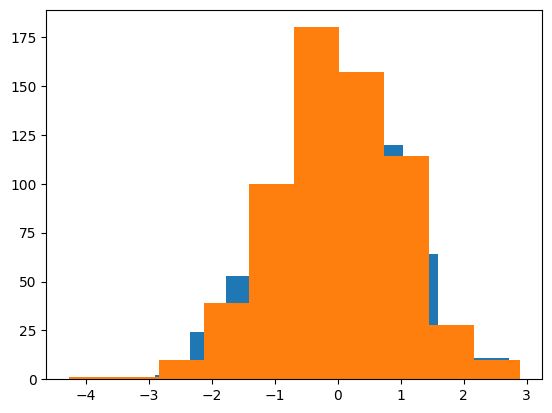

In [8]:
train_indices, test_indices= Splitter(data)
data_train= data[train_indices]
data_cv= data[test_indices]
X_train= data_train[:, :2]
y_train= data_train[:, 2:]
X_cv= data_cv[:, :2]
y_cv= data_cv[:, 2:]
X_train= boxcox_gauss_transform(np.array(X_train))    
scaler= Standard_Scaler()
X_train=scaler.fit_transform(X_train)
plt.hist(np.array(X_train[:, 1]))
plt.hist(np.array(X_train[:, 0]))

In [9]:
model=Naive_Bayes()

In [10]:
model.fit(X_train, y_train)

In [11]:
y_pred=model.predict(X_train)
y_pred

array([1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1.

In [12]:
def accuracy(y, y_pred):
    count=0
    for i in range(len(y)):
        count+=(y[i]==y_pred[i])
    return (count/len(y))
        

In [13]:
print(accuracy(y_train, y_pred))

[0.915625]


(array([ 1.,  5.,  6., 18., 34., 33., 25., 20., 13.,  5.]),
 array([-2.95686612, -2.42436718, -1.89186824, -1.3593693 , -0.82687036,
        -0.29437143,  0.23812751,  0.77062645,  1.30312539,  1.83562433,
         2.36812327]),
 <BarContainer object of 10 artists>)

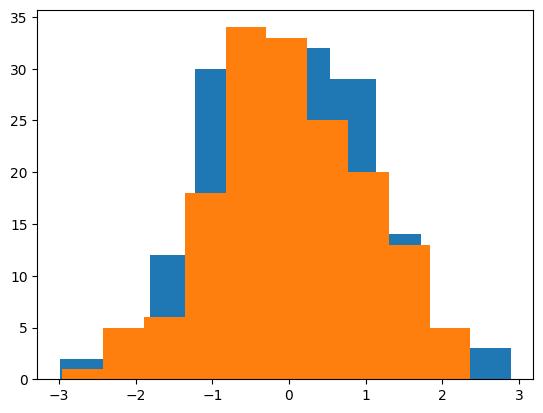

In [14]:
X_cv= boxcox_gauss_transform(X_cv)
X_cv=scaler.fit_transform(X_cv)
plt.hist(X_cv[:, 1])
plt.hist(X_cv[:, 0])

In [15]:
y_pred_cv= model.predict(X_cv)
print(accuracy(y_cv, y_pred_cv))

[0.88125]


(array([ 3.,  6.,  8., 16., 23., 18., 14.,  8.,  3.,  1.]),
 array([-2.44934736, -1.9320058 , -1.41466424, -0.89732268, -0.37998112,
         0.13736043,  0.65470199,  1.17204355,  1.68938511,  2.20672667,
         2.72406822]),
 <BarContainer object of 10 artists>)

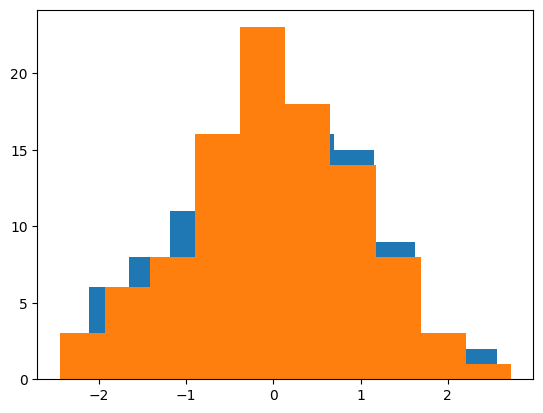

In [16]:
data_test= pd.read_csv('ds1_test.csv')
X_test=np.array(data_test.iloc[:, :2])
y_test=np.array(data_test.iloc[:, 2:])
X_test= boxcox_gauss_transform(np.array(X_test))    
X_test=scaler.fit_transform(X_test)
plt.hist(np.array(X_test[:, 0]))
plt.hist(np.array(X_test[:, 1]))

In [17]:
y_pred_test= model.predict(X_test)
print( accuracy(y_test.reshape(100,), y_pred_test))

0.94


In [18]:
#loading the next set of data

data_new= np.array(pd.read_csv('ds2_train.csv'))
train, test= Splitter(data_new)
X_train_new= data_new[train][:, :2]
X_cv_new= data_new[test][:, :2]
y_train_new= data_new[train][:, 2:]
y_cv_new= data_new[test][:, 2:]

(array([  1.,   1.,  13.,  43., 104., 175., 158., 103.,  37.,   5.]),
 array([-4.18012026, -3.47072752, -2.76133479, -2.05194206, -1.34254933,
        -0.6331566 ,  0.07623614,  0.78562887,  1.4950216 ,  2.20441433,
         2.91380706]),
 <BarContainer object of 10 artists>)

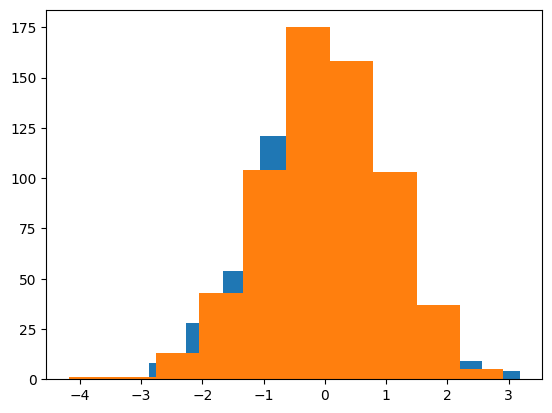

In [19]:
X_train_new= boxcox_gauss_transform(X_train_new)
X_train_new= scaler.fit_transform(X_train_new)
plt.hist(X_train_new[:, 0])
plt.hist(X_train_new[:, 1])

In [20]:
model_new= Naive_Bayes()
model_new.fit(X_train_new, y_train_new)
y_pred_train_new= model_new.predict(X_train_new)
print(accuracy(y_train_new, y_pred_train_new))

[0.915625]


(array([ 4.,  6., 16., 24., 43., 29., 24.,  6.,  7.,  1.]),
 array([-2.63945031, -2.08140791, -1.52336552, -0.96532312, -0.40728073,
         0.15076166,  0.70880406,  1.26684645,  1.82488885,  2.38293124,
         2.94097363]),
 <BarContainer object of 10 artists>)

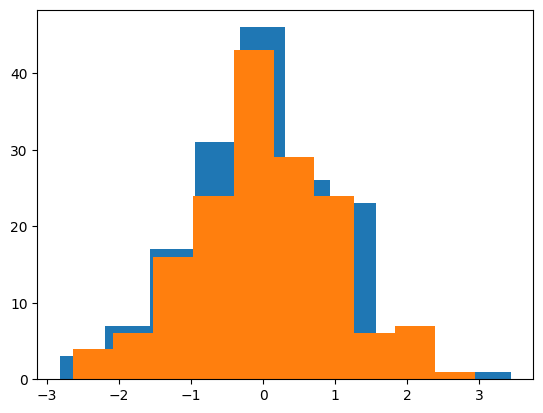

In [21]:
X_cv_new= boxcox_gauss_transform(X_cv_new)
X_cv_new= scaler.fit_transform(X_cv_new)
plt.hist(X_cv_new[:, 0])
plt.hist(X_cv_new[:, 1])

In [22]:
y_pred_cv_new= model_new.predict(X_cv_new)
print(accuracy(y_cv_new, y_pred_cv_new))

[0.90625]


In [23]:
data_test_new= np.array(pd.read_csv('ds2_test.csv'))

(array([ 2.,  4., 10., 15., 13., 31., 20.,  0.,  3.,  2.]),
 array([-2.79452514, -2.22045323, -1.64638132, -1.07230941, -0.4982375 ,
         0.07583442,  0.64990633,  1.22397824,  1.79805015,  2.37212206,
         2.94619397]),
 <BarContainer object of 10 artists>)

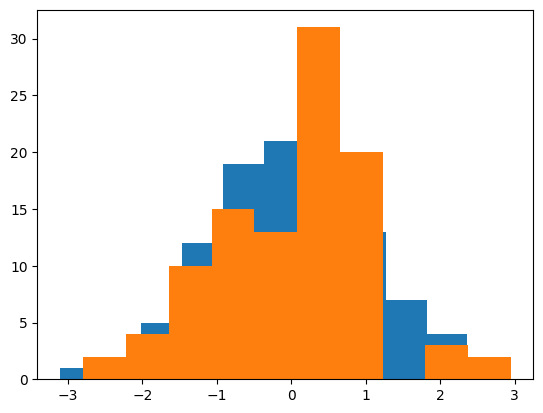

In [24]:
X_test_new= data_test_new[:, :2]
y_test_new= data_test_new[:, 2:]
X_test_new= boxcox_gauss_transform(X_test_new)
X_test_new= scaler.fit_transform(X_test_new)
plt.hist(X_test_new[:, 0])
plt.hist(X_test_new[:, 1])


In [25]:
y_pred_test_new= model_new.predict(X_test_new)
print(accuracy(y_pred_test_new, y_test_new))

[0.91]


# applying sklearn to both datasets

In [26]:
# applying sklearn model of ds_1
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train_1= gnb.predict(X_train)
print(accuracy(y_train, y_pred_train_1))

[0.915625]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y_pred_test_1= gnb.predict(X_test)
print(accuracy(y_test, y_pred_test_1))

[0.94]


In [29]:
#applying sklearn model of ds_2
gnb.fit(X_train_new, y_train_new)
y_pred_train_2= gnb.predict(X_train_new)
print(accuracy(y_train_new, y_pred_train_2))

[0.915625]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_pred_test_2= gnb.predict(X_test_new)
print(accuracy(y_test_new, y_pred_test_2))

[0.91]
